In [2]:
df_data_1 = pd.read_csv('./processed/total_Q12005.csv')
df_data_1.head()
df_data_2 = pd.read_csv('./processed/total_Q12005.csv')
df_data_2.head()

/usr/local/src/conda3_runtime/4.1.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,MSA,MORTAGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORGINAL_COMBINED_LOAN_TO_VALUE,...,MI_RECOVERIES,NET_SALES_PROCEEDS,NON_MI_RECOVERIES,EXPENSES,LEGAL_COSTS,MAINTAINENCE_PRESERVATION_COSTS,TAXES_AND_INSURANCE,MISC_EXPENSES,ACTUAL_LOSS_CALCULATION,MODIFICATION_COST
0,0,699,2005-05-01,N,203504,39300.0,0,1.0,O,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1,691,2005-04-01,N,203503,36420.0,25,1.0,O,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,713,2005-03-01,N,203502,28740.0,0,1.0,O,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,3,719,2005-05-01,N,203504,NaN,0,1.0,S,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,4,656,2005-03-01,N,203502,40340.0,0,1.0,O,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, KFold, StratifiedShuffleSplit,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from ggplot import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

/gpfs/fs01/user/sf25-56c748a700a818-16c413432379/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
Performance_label ={"LOAN_SEQUENCE_NUMBER": object,
                    "MONTHLY_REPORTING_PERIOD": object,
                    "CURENT_ACTUAL_UPB": float,
                    "CURRENT_LOAN_DELINQUENCY_STATUS": object,
                    "LOAN_AGE": int,
                    "REMAINING_MONTHS_TO_LEAGL_MATURITY": float,
                    "REPURCHASE_FLAG": object,
                    "MODIFICATION_FLAG": object,
                    "ZERO_BALANCE_CODE":object,
                    "ZERO_BALANCE_EFFECTIVE_DATE": object,
                    "CURRENT_INTEREST_RATE": float,
                    "CURRENT_DEFEREED_UPB": np.dtype(object),
                    "DUE_DATE_OF_LAST_PAID_INSTALLMENT":np.dtype(object),
                    "MI_RECOVERIES":np.dtype(object),
                    "NET_SALES_PROCEEDS":np.dtype(object),
                    "NON_MI_RECOVERIES":np.dtype(object),
                    "EXPENSES":np.dtype(object),
                    "LEGAL_COSTS":np.dtype(object),
                    "MAINTAINENCE_PRESERVATION_COSTS":np.dtype(object),
                    "TAXES_AND_INSURANCE":np.dtype(object),
                    "MISC_EXPENSES":np.dtype(object),
                    "ACTUAL_LOSS_CALCULATION":np.dtype(object),
                    "MODIFICATION_COST":np.dtype(object)
}

Performance_names =["LOAN_SEQUENCE_NUMBER",
                    "MONTHLY_REPORTING_PERIOD",
                    "CURENT_ACTUAL_UPB",
                    "CURRENT_LOAN_DELINQUENCY_STATUS",
                    "LOAN_AGE",
                    "REMAINING_MONTHS_TO_LEAGL_MATURITY",
                    "REPURCHASE_FLAG",
                    "MODIFICATION_FLAG",
                    "ZERO_BALANCE_CODE",
                    "ZERO_BALANCE_EFFECTIVE_DATE",
                    "CURRENT_INTEREST_RATE",
                    "CURRENT_DEFEREED_UPB",
                    "DUE_DATE_OF_LAST_PAID_INSTALLMENT",
                    "MI_RECOVERIES",
                    "NET_SALES_PROCEEDS",
                    "NON_MI_RECOVERIES",
                    "EXPENSES",
                    "LEGAL_COSTS",
                    "MAINTAINENCE_PRESERVATION_COSTS",
                    "TAXES_AND_INSURANCE",
                    "MISC_EXPENSES",
                    "ACTUAL_LOSS_CALCULATION",
                    "MODIFICATION_COST"
]


In [ ]:
# df_data_3 = pd.read_csv(get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c('DefaultProjectjainpranhuskyneuedu', 'historical_data1_time_Q22005.txt'),sep="|",names =Performance_names, na_values = "NaN",
#                           index_col = False, dtype = Performance_label)
# df_data_3.head()
# df_data_4 = pd.read_csv(get_object_storage_file_with_credentials_d81e053948364da9ae629665be5a872c('DefaultProjectjainpranhuskyneuedu', 'historical_data1_time_Q12005.txt'),sep="|",names =Performance_names, na_values = "NaN",
#                           index_col = False, dtype = Performance_label)
# df_data_4.head()

In [5]:
#using label encoder to convert categorical columns into numeric values
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                if feature!='Deliquency':
                    df[feature] = le.fit_transform(df[feature])
                else:
                    print('Hello')
                    df[feature] = df[feature]
            except:
                print('Error encoding '+feature)
        return df

In [ ]:

# df_data_2['REPURCHASE_FLAG'].astype(bool)
# df_data_2['MODIFICATION_FLAG'].astype(bool)
# df_data_2.loc[df_data_2['ZERO_BALANCE_CODE'].isnull(), 'ZERO_BALANCE_CODE'] = 0
# df_data_2['ZERO_BALANCE_CODE']=df_data_2['ZERO_BALANCE_CODE'].astype('int')
# df_data_2['ZERO_BALANCE_EFFECTIVE_DATE'].astype(object)
# df_data_2['ZERO_BALANCE_EFFECTIVE_DATE'] = pd.to_datetime(df_data_2['ZERO_BALANCE_EFFECTIVE_DATE'],format ='%Y%m')

In [ ]:

# df_data_2['ZERO_BALANCE_CODE'].unique()

# dataframe['MODIFICATION_FLAG'].fillna(method='ffill')
dataframe['ACTUAL_LOSS_CALCULATION'].unique()

In [12]:
#load the dataframe
dataframe = df_data_2
dataframe.convert_objects(convert_numeric=True)
dataframe['CURRENT_LOAN_DELINQUENCY_STATUS']=dataframe['CURRENT_LOAN_DELINQUENCY_STATUS'].convert_objects(convert_numeric=True)
dataframe['REPURCHASE_FLAG'].astype(bool)
dataframe['MODIFICATION_FLAG'].astype(bool)
dataframe.loc[dataframe['ZERO_BALANCE_CODE'].isnull(), 'ZERO_BALANCE_CODE'] = 0
dataframe.loc[dataframe['ACTUAL_LOSS_CALCULATION'].isnull(), 'ACTUAL_LOSS_CALCULATION'] = 0
dataframe.loc[dataframe['EXPENSES'].isnull(), 'EXPENSES'] = 0
dataframe.loc[dataframe['MI_RECOVERIES'].isnull(), 'MI_RECOVERIES'] = 0
dataframe['ZERO_BALANCE_CODE']=dataframe['ZERO_BALANCE_CODE'].astype('int')
dataframe['Deliquency'] = np.where(dataframe['CURRENT_LOAN_DELINQUENCY_STATUS'] > 0 , 1, 0)
dataframe.loc[dataframe['NON_MI_RECOVERIES'].isnull(), 'NON_MI_RECOVERIES'] = 0
new_val = 'N'
dataframe['MODIFICATION_FLAG']= np.where(pd.isnull(dataframe['MODIFICATION_FLAG']) ,new_val,dataframe['MODIFICATION_FLAG'] )
#dataframe['ORIGINAL_DEBT_TO_INCOME_RATIO']=dataframe['ORIGINAL_DEBT_TO_INCOME_RATIO'].convert_objects(convert_numeric=True)
#dataframe['MORTAGAGE_INSURANCE_PERCENTAGE']=dataframe['MORTAGAGE_INSURANCE_PERCENTAGE'].convert_objects(convert_numeric=True)
dataframe = dataframe.fillna(method='ffill')

dataframe_quarter = df_data_1
dataframe_quarter['CURRENT_LOAN_DELINQUENCY_STATUS']=dataframe_quarter['CURRENT_LOAN_DELINQUENCY_STATUS'].convert_objects(convert_numeric=True)

dataframe_quarter['REPURCHASE_FLAG'].astype(bool)
dataframe_quarter['MODIFICATION_FLAG'].astype(bool)
dataframe_quarter.loc[dataframe_quarter['ZERO_BALANCE_CODE'].isnull(), 'ZERO_BALANCE_CODE'] = 0
dataframe_quarter.loc[dataframe_quarter['ACTUAL_LOSS_CALCULATION'].isnull(), 'ACTUAL_LOSS_CALCULATION'] = 0
dataframe_quarter.loc[dataframe_quarter['EXPENSES'].isnull(), 'EXPENSES'] = 0
dataframe_quarter.loc[dataframe_quarter['MI_RECOVERIES'].isnull(), 'MI_RECOVERIES'] = 0
dataframe_quarter.loc[dataframe_quarter['NON_MI_RECOVERIES'].isnull(), 'NON_MI_RECOVERIES'] = 0
dataframe_quarter['ZERO_BALANCE_CODE']=dataframe_quarter['ZERO_BALANCE_CODE'].astype('int')
dataframe_quarter['Deliquency'] = np.where(dataframe_quarter['CURRENT_LOAN_DELINQUENCY_STATUS'] > 0 , 1,0)
new_val = 'N'
dataframe_quarter['MODIFICATION_FLAG']= np.where(pd.isnull(dataframe_quarter['MODIFICATION_FLAG']) ,new_val,dataframe_quarter['MODIFICATION_FLAG'] )
#dataframe_quarter['ORIGINAL_DEBT_TO_INCOME_RATIO']=dataframe_quarter['ORIGINAL_DEBT_TO_INCOME_RATIO'].convert_objects(convert_numeric=True)
#dataframe_quarter['MORTAGAGE_INSURANCE_PERCENTAGE']=dataframe_quarter['MORTAGAGE_INSURANCE_PERCENTAGE'].convert_objects(convert_numeric=True)
#feature selection based on coefficient values
######
dataframe_quarter = dataframe_quarter.fillna(method='ffill')
#feature_cols_dataframe=dataframe[["PROPERTY_STATE",'PROPERTY_TYPE',"LOAN_PURPOSE",'CREDIT_SCORE','ORGINAL_COMBINED_LOAN_TO_VALUE','ORIGINAL_DEBT_TO_INCOME_RATIO','ORIGINAL_LOAN_TO_VALUE','ORIGINAL_UPB','ORIGINAL_LOAN_TERM','NUMBER_OF_BORROWERS','SELLER_NAME','SERVICER_NAME','POSTAL_CODE','CHANNEL','OCCUPANCY_STATUS','NUMBER_OF_UNITS','MORTAGAGE_INSURANCE_PERCENTAGE','ORIGINAL_INTEREST_RATE','Deliquency']]
feature_cols_dataframe=dataframe[[
 'MONTHLY_REPORTING_PERIOD',
 #'CURENT_ACTUAL_UPB',
 'LOAN_AGE',
 'REMAINING_MONTHS_TO_LEAGL_MATURITY',
 #'REPURCHASE_FLAG',
 #'MODIFICATION_FLAG',
 'ZERO_BALANCE_CODE',
 'ZERO_BALANCE_EFFECTIVE_DATE',
 'CURRENT_INTEREST_RATE',
 #'CURRENT_DEFEREED_UPB',
 #'DUE_DATE_OF_LAST_PAID_INSTALLMENT',
 #'MI_RECOVERIES',
 #'NET_SALES_PROCEEDS',
 #'NON_MI_RECOVERIES',
 #'EXPENSES',
 'ACTUAL_LOSS_CALCULATION',
 'Deliquency']]                                                                                                                        

#transforming categorical/string data into numeric data for the algorithm
#used custom encoding instead of one hot encoding for memory efficiency
transformed_df=dummyEncode(feature_cols_dataframe)
print(transformed_df.head(5))
transformed_df_next_quarter=dummyEncode(feature_cols_dataframe)
print(transformed_df_next_quarter.head(5))

#fetch training and test data
Y_train=transformed_df.Deliquency

X_train=transformed_df


Y_test=transformed_df_next_quarter.Deliquency
transformed_df.drop('Deliquency', axis=1, inplace=True)
print(Y_test.head())
#transformed_df_next_quarter.drop('Deliquency', axis=1, inplace=True)
X_test=transformed_df_next_quarter


   MONTHLY_REPORTING_PERIOD  LOAN_AGE  REMAINING_MONTHS_TO_LEAGL_MATURITY  \
0                        13      11.0                               349.0   
1                        51      51.0                               310.0   
2                       139     139.0                               221.0   
3                        40      38.0                               322.0   
4                       139     139.0                               221.0   

   ZERO_BALANCE_CODE  ZERO_BALANCE_EFFECTIVE_DATE  CURRENT_INTEREST_RATE  \
0                  1                     200603.0                  5.625   
1                  1                     200905.0                  5.750   
2                  0                     200905.0                  6.000   
3                  1                     200806.0                  5.750   
4                  0                     200806.0                  5.625   

   ACTUAL_LOSS_CALCULATION  Deliquency  
0                      0.0           0 

Choose the model that you want to run:  A. Logistic Regression   B. Neural Network   C. Random Forest  D. SVN A
Intercept is  [ -6.61571750e-08]
Coefficient is  [[  5.28484169e-03   8.51252158e-03   8.42546980e-03  -1.06706907e-04
   -3.21789483e-05   1.95976695e-04  -4.01604406e-05]]


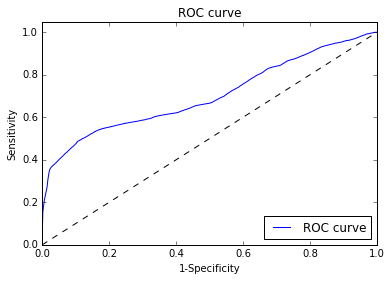

[[334438    479]
 [ 14722   2100]]
0.956783296706


In [13]:

def calculate_roc_curve(Y_test, y_pred, pos_label):
    
    fpr, tpr, _ = roc_curve(Y_test, preds)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)






    

    


model_number = input("Choose the model that you want to run:"
                      "  A. Logistic Regression "
                      "  B. Neural Network "
                      "  C. Random Forest"
                      "  D. SVN"
                      " "
                     )



if model_number == "A":
    #logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    print ("Intercept is ",log_reg.intercept_)
    print("Coefficient is ",log_reg.coef_)
    y_pred=log_reg.predict(X_test)

    #calculate ROC curve
    preds = log_reg.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)

    #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)

    print(accuracy_score(Y_test, y_pred))
    
    
elif model_number == "B":
        
    #neural network
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
    neural_network_class.fit(X_train,Y_train)
    predictions = neural_network_class.predict(X_test)
    y_pred=predictions

    #calculate ROC curve
    preds = neural_network_class.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)
     #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)
    
    print(accuracy_score(Y_test, y_pred))


elif model_number == "C":
    #Random Forest
    rf = RandomForestClassifier(n_jobs=2)
    rf.fit(X_train, Y_train)
    preds = rf.predict_proba(X_test)[:,1]
    y_pred=rf.predict(X_test)
    #calculate ROC curve
    calculate_roc_curve(Y_test, y_pred,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        

elif model_number == "D":
    
    print("Staring Support Vector Machine")
    clf = SVC()
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    #calculate ROC curve
    preds = clf.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        
else:
        print("Running all four algorithms in parallel")
        



Choose the model that you want to run:  A. Logistic Regression   B. Neural Network   C. Random Forest  D. SVN B


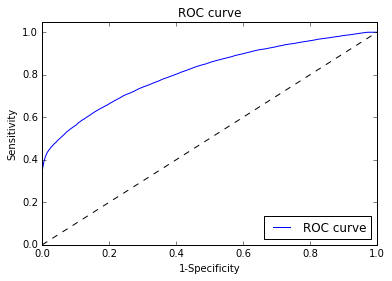

[[334791    126]
 [ 10947   5875]]
0.968519271392


In [14]:

def calculate_roc_curve(Y_test, y_pred, pos_label):
    
    fpr, tpr, _ = roc_curve(Y_test, preds)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)






    

    


model_number = input("Choose the model that you want to run:"
                      "  A. Logistic Regression "
                      "  B. Neural Network "
                      "  C. Random Forest"
                      "  D. SVN"
                      " "
                     )



if model_number == "A":
    #logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    print ("Intercept is ",log_reg.intercept_)
    print("Coefficient is ",log_reg.coef_)
    y_pred=log_reg.predict(X_test)

    #calculate ROC curve
    preds = log_reg.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)

    #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)

    print(accuracy_score(Y_test, y_pred))
    
    
elif model_number == "B":
        
    #neural network
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
    neural_network_class.fit(X_train,Y_train)
    predictions = neural_network_class.predict(X_test)
    y_pred=predictions

    #calculate ROC curve
    preds = neural_network_class.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)
     #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)
    
    print(accuracy_score(Y_test, y_pred))


elif model_number == "C":
    #Random Forest
    rf = RandomForestClassifier(n_jobs=2)
    rf.fit(X_train, Y_train)
    preds = rf.predict_proba(X_test)[:,1]
    y_pred=rf.predict(X_test)
    #calculate ROC curve
    calculate_roc_curve(Y_test, y_pred,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        

elif model_number == "D":
    
    print("Staring Support Vector Machine")
    clf = SVC()
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    #calculate ROC curve
    preds = clf.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        
else:
        print("Running all four algorithms in parallel")
        



Choose the model that you want to run:  A. Logistic Regression   B. Neural Network   C. Random Forest  D. SVN C


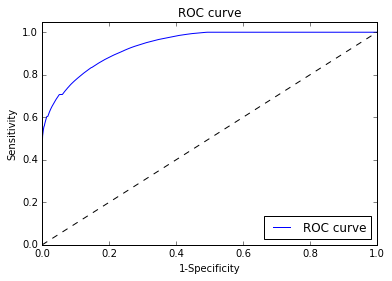

[[334676    241]
 [  8574   8248]]
0.974938804056


In [15]:

def calculate_roc_curve(Y_test, y_pred, pos_label):
    
    fpr, tpr, _ = roc_curve(Y_test, preds)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)






    

    


model_number = input("Choose the model that you want to run:"
                      "  A. Logistic Regression "
                      "  B. Neural Network "
                      "  C. Random Forest"
                      "  D. SVN"
                      " "
                     )



if model_number == "A":
    #logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    print ("Intercept is ",log_reg.intercept_)
    print("Coefficient is ",log_reg.coef_)
    y_pred=log_reg.predict(X_test)

    #calculate ROC curve
    preds = log_reg.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)

    #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)

    print(accuracy_score(Y_test, y_pred))
    
    
elif model_number == "B":
        
    #neural network
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
    neural_network_class.fit(X_train,Y_train)
    predictions = neural_network_class.predict(X_test)
    y_pred=predictions

    #calculate ROC curve
    preds = neural_network_class.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)
     #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)
    
    print(accuracy_score(Y_test, y_pred))


elif model_number == "C":
    #Random Forest
    rf = RandomForestClassifier(n_jobs=2)
    rf.fit(X_train, Y_train)
    preds = rf.predict_proba(X_test)[:,1]
    y_pred=rf.predict(X_test)
    #calculate ROC curve
    calculate_roc_curve(Y_test, y_pred,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        

elif model_number == "D":
    
    print("Staring Support Vector Machine")
    clf = SVC()
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    #calculate ROC curve
    preds = clf.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        
else:
        print("Running all four algorithms in parallel")
        



In [ ]:

def calculate_roc_curve(Y_test, y_pred, pos_label):
    
    fpr, tpr, _ = roc_curve(Y_test, preds)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)






    

    


model_number = input("Choose the model that you want to run:"
                      "  A. Logistic Regression "
                      "  B. Neural Network "
                      "  C. Random Forest"
                      "  D. SVN"
                      " "
                     )



if model_number == "A":
    #logistic regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    print ("Intercept is ",log_reg.intercept_)
    print("Coefficient is ",log_reg.coef_)
    y_pred=log_reg.predict(X_test)

    #calculate ROC curve
    preds = log_reg.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)

    #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)

    print(accuracy_score(Y_test, y_pred))
    
    
elif model_number == "B":
        
    #neural network
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))
    neural_network_class.fit(X_train,Y_train)
    predictions = neural_network_class.predict(X_test)
    y_pred=predictions

    #calculate ROC curve
    preds = neural_network_class.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2)
     #calculate Confusion Matrix
    calculate_confusion_matrix(Y_test, y_pred)
    
    print(accuracy_score(Y_test, y_pred))


elif model_number == "C":
    #Random Forest
    rf = RandomForestClassifier(n_jobs=2)
    rf.fit(X_train, Y_train)
    preds = rf.predict_proba(X_test)[:,1]
    y_pred=rf.predict(X_test)
    #calculate ROC curve
    calculate_roc_curve(Y_test, y_pred,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        

elif model_number == "D":
    
    print("Staring Support Vector Machine")
    clf = SVC()
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    
    #calculate ROC curve
    preds = clf.predict_proba(X_test)[:,1]
    calculate_roc_curve(Y_test, preds,2) 
     #calculate Confusion Matrix

    calculate_confusion_matrix(Y_test, y_pred)
    print(accuracy_score(Y_test, y_pred))
        
else:
        print("Running all four algorithms in parallel")
        



Choose the model that you want to run:  A. Logistic Regression   B. Neural Network   C. Random Forest  D. SVN D
Staring Support Vector Machine


In [17]:
# RFE Code to extract features
model = LogisticRegression()
rfe = RFE(model, 7)
fit = rfe.fit(X_train, Y_train)
print("Num Features:", fit.n_features_)
print("Selected Features" , fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features: 7
Selected Features [ True  True  True  True  True  True  True]
Feature Ranking:  [1 1 1 1 1 1 1]


In [18]:
#stats model for feature extraction
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
logit = sm.Logit(Y_train, X_train)
affair_mod = logit.fit()
print(affair_mod.summary())

Optimization terminated successfully.
         Current function value: 0.670096
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             Deliquency   No. Observations:               351739
Model:                          Logit   Df Residuals:                   351732
Method:                           MLE   Df Model:                            6
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  -2.489
Time:                        19:49:42   Log-Likelihood:            -2.3570e+05
converged:                       True   LL-Null:                       -67555.
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -3.3122      0.057    -57.654      0.000        -3.425    -3.200
x2             3.7797      0.